# Concessão de Crédito - Estudo de Caso - Neurotech
Mariana Vieira, 2024

# Entendimento da base e análise exploratória dos dados

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
train = pd.read_csv('train.gz', compression='gzip')
test = pd.read_csv('test.gz', compression='gzip')
print("Formato dataset: ", train.shape)
print(train.info())
train.head(5)

Formato dataset:  (120750, 151)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120750 entries, 0 to 120749
Columns: 151 entries, REF_DATE to ID
dtypes: float64(34), int64(3), object(114)
memory usage: 139.1+ MB
None


,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,NaN,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,NaN,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,NaN,RS,-27.900178,-53.314035,NaN,E,...,1695.494979,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,NaN,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,NaN,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272


Conferindo se as variáveis de treino e teste são as mesmas

In [233]:
set(train.columns).symmetric_difference(set(test.columns))

set()

In [237]:
set(train.columns) == (set(test.columns))

True

In [240]:
set(train['ID']).intersection(set(test['ID']))

set()

Vou juntar os dados de treino e teste para fazer o pre-processamento das variáveis de forma consistente, enquanto guardo os IDs de cada para uso futuro.

In [241]:
data = pd.concat([train, test], axis=1)

Algumas colunas parecem apresentar muitos valores NaN. Vamos analisar a porcentagem de valores NaN em cada coluna.

In [214]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
VAR146,120582,0.998609
VAR4,120548,0.998327
VAR46,120456,0.997565
VAR45,120456,0.997565
VAR44,120349,0.996679
VAR43,120349,0.996679
VAR145,120071,0.994377
VAR38,119981,0.993631
VAR26,119742,0.991652
VAR27,119708,0.991371


In [215]:
# e pra teste
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
VAR146,51672,0.998473
VAR4,51664,0.998319
VAR46,51628,0.997623
VAR45,51628,0.997623
VAR44,51577,0.996638
VAR43,51577,0.996638
VAR145,51488,0.994918
VAR38,51423,0.993662
VAR26,51351,0.992271
VAR27,51341,0.992077


Vamos excluir as colunas que apresentarem mais de 20% de valores NaN. 

In [216]:
columns_drop = missing_data.index[missing_data['Percent']>=0.21]
train.drop(columns=columns_drop, inplace=True)
test.drop(columns=columns_drop, inplace=True)

print("Formato do dataset de treino após eliminar colunas: ", train.shape)
train = train.dropna()
print("Formato do dataset de treino  após eliminar entradas com NaN: ", train.shape)
print("Formato do dataset de teste após eliminar colunas: ", test.shape)
test = test.dropna()
print("Formato do dataset de teste após eliminar entradas com NaN: ", test.shape)

Formato do dataset de treino após eliminar colunas:  (120750, 113)
Formato do dataset de treino  após eliminar entradas com NaN:  (90690, 113)
Formato do dataset de teste após eliminar colunas:  (51751, 113)
Formato do dataset de teste após eliminar entradas com NaN:  (38916, 113)


Checando por entradas duplicadas

In [169]:
duplicadas = train.duplicated()
duplicadas.unique()

array([False])

In [170]:
duplicadas = test.duplicated()
duplicadas.unique()

array([False])

E por dados ambíguos ou que não contêm a variável target definida

In [171]:
train['TARGET'].unique()

array([0, 1], dtype=int64)

In [172]:
data_noisy = train.drop(columns=['ID', 'REF_DATE'])
train['unique_target'] = train.groupby(data_noisy.columns.to_list())['TARGET'].transform('nunique')
print(train['unique_target'].unique())
noisy_train = train[train['unique_target'] > 1].drop('unique_target', axis=1)
print(train.shape)
train = train.drop(columns=['unique_target'])

[1]
(90690, 114)


Balanceamento da váriavel 'TARGET'

In [173]:
bad = train['TARGET'].value_counts()[0]
good = train['TARGET'].value_counts()[1]
total = train['TARGET'].value_counts().sum() 
percent_good = (good/total)*100
percent_bad = (bad/total)*100

print('% Bons Pagadores: ', round(percent_good, 2),'%')
print('% Maus Pagadores: ', round(percent_bad, 2),'%')


% Bons Pagadores:  22.49 %
% Maus Pagadores:  77.51 %


In [174]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=[0, 1], y=[percent_bad, percent_good],
            showlegend=False,
            marker=dict(color='rgba(155, 190, 250, 0.7)')
            ))
fig.add_annotation(
    text='Dados de treino',
    xref='paper', yref='paper',
    x=-0.23, y=1.1,  
    showarrow=False,
    font=dict(size=12, color='rgba(100, 159, 237, 1)'))

# Update layout
fig.update_layout(title_text='% DE PAGADORES',
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  yaxis_ticksuffix="%",
                  coloraxis_colorbar_ticksuffix="m",
                  yaxis_showticksuffix="all"
                  )
fig.update_yaxes(ticks="outside", tickwidth=1, tickcolor='rgba(169, 169, 169, 1)', ticklen=10)
fig.update_yaxes(showline=True, linewidth=1, linecolor='rgba(169, 169, 169, 1)')
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['Maus', 'Bons'])
                  )
fig.layout.update({'width' : 400, 'height': 500})

fig.show()


Parece que temos um desbalanço de classe que deverá ser tratado quando formos treinar do nosso modelo.

Tipos de variáveis no dataset de treino

In [175]:
train.dtypes.value_counts()

object     100
float64     10
int64        3
Name: count, dtype: int64

Temos 100 variáveis com entradas do tipo object, e apenas 12 variáveis de tipo numérico. Para fins de uma primeira análise vou separar em dois dataframes as variáveis numéricas e as variáveis não numéricas.

In [176]:
columns = train.dtypes != 'object'
columns_to_keep = train.columns[columns]
data_num = train[columns_to_keep]
data_num.head()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
0,0,34.137,-8.808779,-63.878470,0.034,0.512334,0.486768,0.357526,0.538737,0.046,2680.289259,102,181755
1,0,40.447,-7.146537,-34.926080,0.017,0.328021,0.447454,0.414335,0.485512,0.099,1777.725469,102,287633
2,0,33.515,-27.900178,-53.314035,0.000,0.627262,0.730539,0.916771,0.519726,1.000,1695.494979,102,88015
3,1,25.797,-12.948874,-38.451863,0.000,0.338643,0.405233,0.408007,0.567710,0.000,1399.037809,102,122576
4,0,54.074,-30.051810,-51.213277,0.000,0.626047,0.770664,0.907036,0.538496,0.017,7868.793296,102,1272


In [177]:
data_cat = train.drop(columns_to_keep, axis=1)
data_cat.head(3)

,REF_DATE,VAR2,VAR5,VAR9,VAR10,VAR49,VAR50,VAR51,VAR52,VAR53,...,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR142,VAR148,VAR149
0,2017-06-01 00:00:00+00:00,M,RO,E,BAIXA,S,N,N,N,N,...,LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,D,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1
1,2017-08-18 00:00:00+00:00,M,PB,E,MEDIA,S,N,N,N,N,...,MEDIO,PROXIMO,PROXIMO,LONGE,LONGE,LONGE,MUITO LONGE,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1
2,2017-06-30 00:00:00+00:00,F,RS,E,ALTISSIMA,S,N,N,N,N,...,LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1


## Tratamento das variáveis categoricas

As colunas REF_DATE, VAR48 e VAR49 não parecem adicionar informação no nosso modelo 

In [178]:
data_cat['VAR148'].value_counts()

VAR148
EMAIL INEXISTENTE                                         47215
EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE    34224
OPERACAO REALIZADA COM SUCESSO                             9251
Name: count, dtype: int64

In [179]:
data_cat['VAR149'].value_counts()

VAR149
2.6.1    90690
Name: count, dtype: int64

In [180]:
data_cat = data_cat.drop(columns=['REF_DATE', 'VAR148', 'VAR149'])

In [181]:
data_cat.head(5)

,VAR2,VAR5,VAR9,VAR10,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR142
0,M,RO,E,BAIXA,S,N,N,N,N,N,...,LONGE,MUITO LONGE,LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,D
1,M,PB,E,MEDIA,S,N,N,N,N,N,...,MEDIO,LONGE,MEDIO,PROXIMO,PROXIMO,LONGE,LONGE,LONGE,MUITO LONGE,E
2,F,RS,E,ALTISSIMA,S,N,N,N,N,N,...,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,E
3,F,BA,E,MEDIA,S,S,N,N,N,N,...,LONGE,LONGE,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MEDIO,E
4,F,RS,E,MEDIA,S,S,N,N,N,N,...,MEDIO,PROXIMO,PROXIMO,MUITO PROXIMO,MEDIO,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO PROXIMO,C


### Enconding Categorical Features
Nesta sessão vamos: 
1) Determinar quais são as categorias existentes em todo o dataset 2) Determinar quais colunas apresentam quais categorias e se são ordinais ou nominais.

Quais são as escalas existentes?

In [182]:
# get the unique categories for each column
# leave out the state feature
unique_categories = {column: sorted(data_cat[column].unique()) for column in data_cat.drop(columns=['VAR5']).columns}
unique_cats = set(tuple(x) for x in unique_categories.values())
unique_cats

{('A', 'B', 'C', 'D', 'E'),
 ('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA'),
 ('ALTA', 'ALTISSIMA', 'BAIXISSIMA'),
 ('ALTA', 'ALTISSIMA', 'BAIXISSIMA', 'MEDIA'),
 ('ALTISSIMA', 'BAIXISSIMA'),
 ('F', 'M'),
 ('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO'),
 ('LONGE', 'MEDIO', 'MUITO LONGE', 'PROXIMO'),
 ('MUITO LONGE', 'PROXIMO'),
 ('N', 'S')}

Normalizando respectivamente todas as variáveis com entradas de distância e frequência para:

('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO')

('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA')

In [183]:
categoriais_ordinais = [('A', 'B', 'C', 'D', 'E'), ('ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA'), 
                    ('LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO')]
categorias_nominais = [('N', 'S'),('F', 'M')]
ordinal_columns = []
ordinal_columns0 = []
ordinal_columns1 = []
ordinal_columns2 = []
nominal_columns = []

for col in data_cat.drop(columns=['VAR5']):
    if  any(set(tuple(unique_categories[col])).issubset(x) for x in categoriais_ordinais):
        ordinal_columns.append(col)
    if set(tuple(unique_categories[col])).issubset(categoriais_ordinais[0]):
        ordinal_columns0.append(col)
    elif set(tuple(unique_categories[col])).issubset(categoriais_ordinais[1]):
        ordinal_columns1.append(col)
    elif set(tuple(unique_categories[col])).issubset(categoriais_ordinais[2]):
        ordinal_columns2.append(col)
    elif any(set(tuple(unique_categories[col])).issubset(x) for x in categorias_nominais):
        nominal_columns.append(col)

In [184]:
ordinal_columns0

['VAR9', 'VAR142']

### Encoding Ordinal Features

Vou usar a função OrdinalEnconder() do sklearn para codificar numericamente as categorias que apresentam uma hierarquia.

In [185]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform="pandas")
encoded = encoder.fit_transform(data_cat[ordinal_columns0])
encoded

,VAR9,VAR142
0,4.0,3.0
1,4.0,4.0
2,4.0,4.0
3,4.0,4.0
4,4.0,2.0
...,...,...
120741,4.0,4.0
120744,4.0,4.0
120745,4.0,4.0
120746,4.0,4.0


In [186]:
encoder1 = OrdinalEncoder(categories=[['BAIXISSIMA', 'BAIXA', 'MEDIA', 'ALTA', 'ALTISSIMA']]*len(ordinal_columns1)).set_output(transform="pandas")
encoded1 = encoder1.fit_transform(data_cat[ordinal_columns1])
encoded1

,VAR10,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,...,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101
0,1.0,2.0,0.0,3.0,0.0,3.0,4.0,0.0,0.0,3.0,...,2.0,0.0,3.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0
1,2.0,3.0,4.0,3.0,0.0,3.0,4.0,3.0,2.0,3.0,...,2.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,2.0
2,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0
4,2.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,1.0,3.0,0.0,3.0,3.0,4.0,3.0,3.0,4.0,2.0,...,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0
120744,2.0,2.0,0.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,...,2.0,0.0,0.0,3.0,3.0,2.0,2.0,3.0,0.0,2.0
120745,4.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,...,3.0,0.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
120746,2.0,2.0,0.0,2.0,0.0,2.0,3.0,3.0,2.0,2.0,...,2.0,0.0,3.0,3.0,3.0,4.0,2.0,3.0,0.0,2.0


In [187]:
encoder2 = OrdinalEncoder(categories=[('MUITO LONGE','LONGE', 'MEDIO', 'PROXIMO', 'MUITO PROXIMO')]*len(ordinal_columns2)).set_output(transform="pandas")
encoded2 = encoder2.fit_transform(data_cat[ordinal_columns2])
encoded2

,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0
1,2.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
3,3.0,2.0,2.0,4.0,3.0,2.0,3.0,1.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,...,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0
120744,3.0,3.0,3.0,4.0,4.0,0.0,3.0,0.0,0.0,3.0,...,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,3.0,1.0
120745,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
120746,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0


### Encoding Nominal Features

Para as escalas que não apresentam ordem vamos usar binary enconding. Como temos apenas duas variáveis, podemos usar também o OrdinalEncoder do sklearn para dar valores numéricos 0 ou 1 para as variáveis categóricas binárias.

In [188]:
encoder = OrdinalEncoder().set_output(transform="pandas")
nominal_encoded = encoder.fit_transform(data_cat[nominal_columns])
nominal_encoded

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120744,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120745,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Juntando todos os encodings em um só dataframe

In [189]:
data_cat_encoded = pd.concat([nominal_encoded, encoded, encoded1, encoded2], axis=1)
data_cat_encoded

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120741,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0
120744,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,3.0,1.0
120745,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
120746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0


### One-Hot-Encoding

Vou encodificar também com o OHE para ver se obtenho um resultado melhor de treinamento do modelo, em comparação com o Ordinal Encoding.

In [190]:
# One-hot encoding of categorical variables
data = pd.get_dummies(data)
test = pd.get_dummies(test)

print('Training Features shape: ', data.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (90690, 671)
Testing Features shape:  (51751, 766)


## Correlações

### Variáveis Numéricas

In [191]:
data_num.corr()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
TARGET,1.000000,-0.099585,0.017368,0.035352,-0.025892,-0.059932,-0.037133,-0.052831,-0.012885,0.005768,0.006303,0.014322,0.000163
IDADE,-0.099585,1.000000,-0.013400,0.030357,0.001784,0.468882,0.015272,0.001469,0.147654,0.071148,0.182082,-0.042676,-0.002710
VAR6,0.017368,-0.013400,1.000000,0.190713,-0.178307,0.104777,-0.158659,0.023605,0.003788,-0.016768,-0.060547,0.068691,0.003584
VAR7,0.035352,0.030357,0.190713,1.000000,-0.021693,0.013116,0.053234,0.070407,0.042662,0.062353,-0.054720,0.065634,-0.003976
VAR24,-0.025892,0.001784,-0.178307,-0.021693,1.000000,-0.263955,0.046417,0.062157,-0.020361,-0.001223,0.096871,-0.208733,0.000456
VAR39,-0.059932,0.468882,0.104777,0.013116,-0.263955,1.000000,0.112170,0.144322,0.111053,0.030592,0.227411,0.006645,-0.004239
VAR40,-0.037133,0.015272,-0.158659,0.053234,0.046417,0.112170,1.000000,0.630679,0.038388,0.007212,0.033213,0.040833,-0.001196
VAR41,-0.052831,0.001469,0.023605,0.070407,0.062157,0.144322,0.630679,1.000000,0.039403,0.009875,-0.012871,0.081660,-0.001235
VAR42,-0.012885,0.147654,0.003788,0.042662,-0.020361,0.111053,0.038388,0.039403,1.000000,0.376633,0.047526,0.016917,0.000368
VAR47,0.005768,0.071148,-0.016768,0.062353,-0.001223,0.030592,0.007212,0.009875,0.376633,1.000000,0.018771,0.035417,-0.002026


In [192]:
correlations = data_num.corr()['TARGET'].sort_values()

print('Correlações mais positivas:\n', correlations.tail(5))
print('\nCorrelações mais negativas:\n', correlations.head(5))

Correlações mais positivas:
 VAR141    0.006303
VAR147    0.014322
VAR6      0.017368
VAR7      0.035352
TARGET    1.000000
Name: TARGET, dtype: float64

Correlações mais negativas:
 IDADE   -0.099585
VAR39   -0.059932
VAR41   -0.052831
VAR40   -0.037133
VAR24   -0.025892
Name: TARGET, dtype: float64


In [193]:
data_num.describe()

,TARGET,IDADE,VAR6,VAR7,VAR24,VAR39,VAR40,VAR41,VAR42,VAR47,VAR141,VAR147,ID
count,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000
mean,0.224854,44.457465,-15.115264,-46.108056,0.080777,0.473655,0.529586,0.623349,0.506114,0.296473,1973.571513,101.795986,165400.926276
std,0.417488,14.452060,9.000852,7.361809,0.139829,0.143269,0.114216,0.218787,0.068577,0.423827,976.600465,0.605318,95479.414152
min,0.000000,18.014000,-33.521563,-72.900276,0.000000,0.049309,0.208688,0.000000,0.006658,0.000000,33.320000,100.000000,3.000000
25%,0.000000,33.145750,-23.066334,-50.090888,0.000000,0.367793,0.447266,0.439848,0.463579,0.001000,1570.658128,102.000000,82952.500000
50%,0.000000,42.501000,-15.835906,-46.723191,0.034000,0.468812,0.508864,0.534467,0.496036,0.010000,1715.997803,102.000000,165495.000000
75%,0.000000,54.751000,-7.028818,-39.306347,0.086000,0.584154,0.582299,0.878171,0.524960,0.823000,1983.503491,102.000000,248460.500000
max,1.000000,105.477000,4.478585,-32.429516,1.000000,0.953539,0.920685,0.982985,0.910865,1.000000,33954.140000,102.000000,330581.000000


<Axes: >

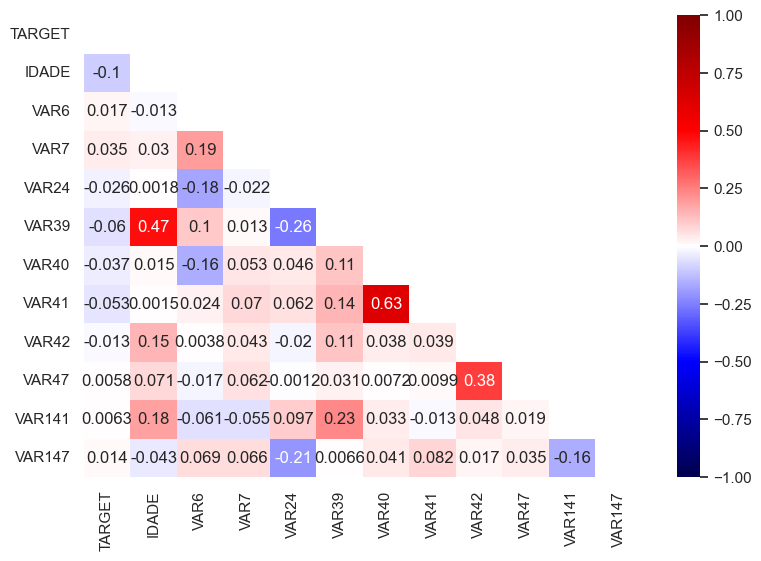

In [194]:
sns.set_theme(style="white")
cmap = 'seismic'
f, ax = plt.subplots(figsize=(9, 6))
mask = np.triu(np.ones_like(data_num.drop(columns=['ID']).corr(), dtype=bool))
vmin = -1
vmax = 1
sns.heatmap(data_num.drop(columns=['ID']).corr(), mask=mask, cmap=cmap, annot=True, vmin=vmin, vmax=vmax)

#### KDE

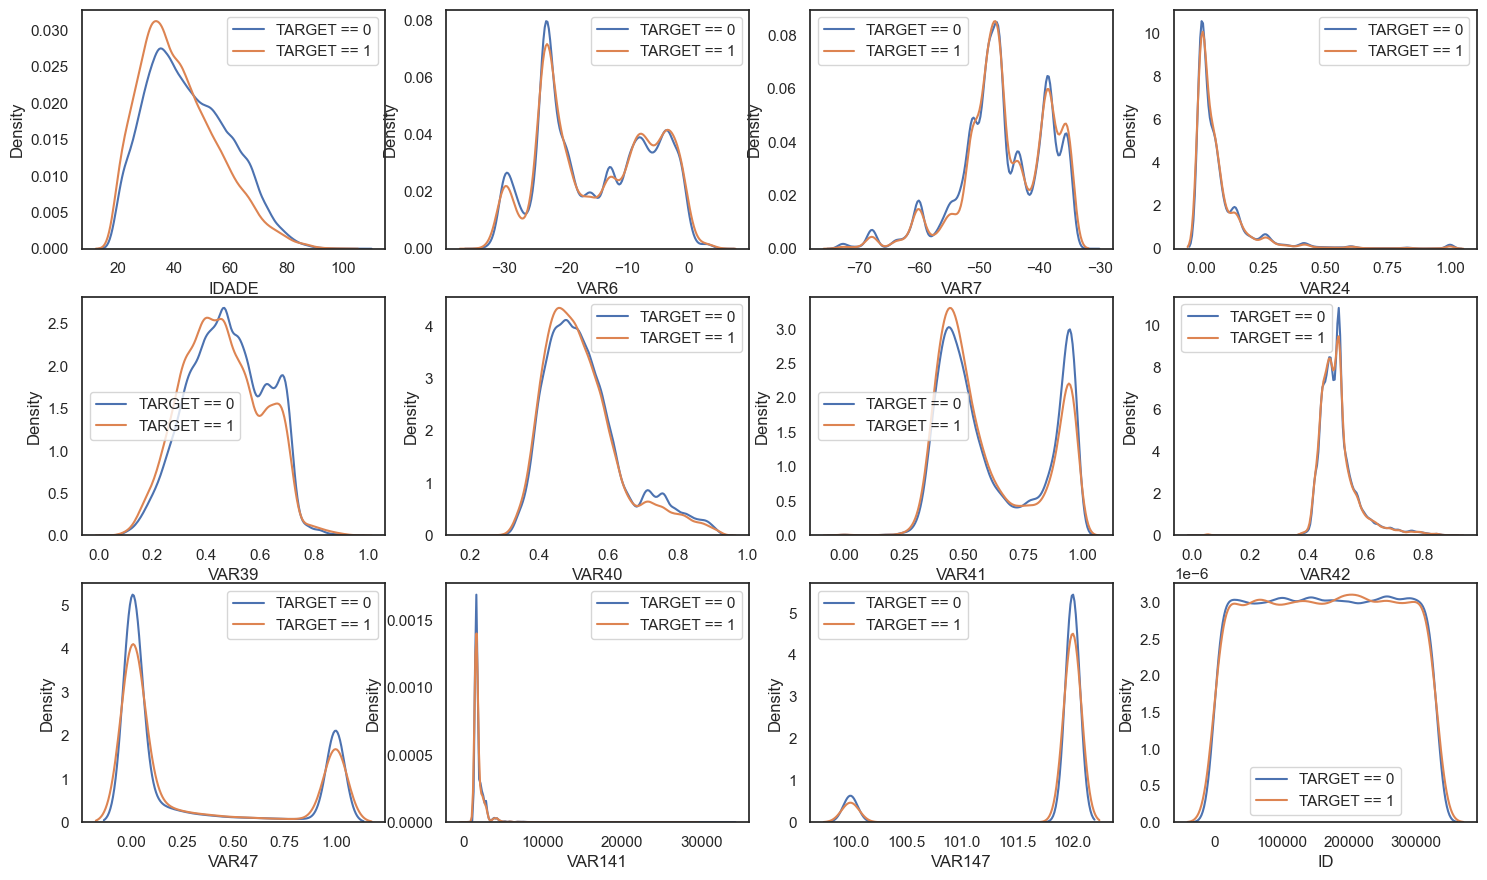

In [195]:
plt.figure(figsize = (18, 18))
data_num_0 = data_num[data_num['TARGET'] == 0].drop(columns=['TARGET'])
data_num_1 = data_num[data_num['TARGET'] == 1].drop(columns=['TARGET'])
for i in range(1, len(columns_to_keep)):
    plt.subplot(5, 4, i)
    sns.kdeplot(data_num_0[columns_to_keep[i]], label = 'TARGET == 0')
    sns.kdeplot(data_num_1[columns_to_keep[i]], label = 'TARGET == 1')
    plt.legend()

#### Gráficos de dispersão

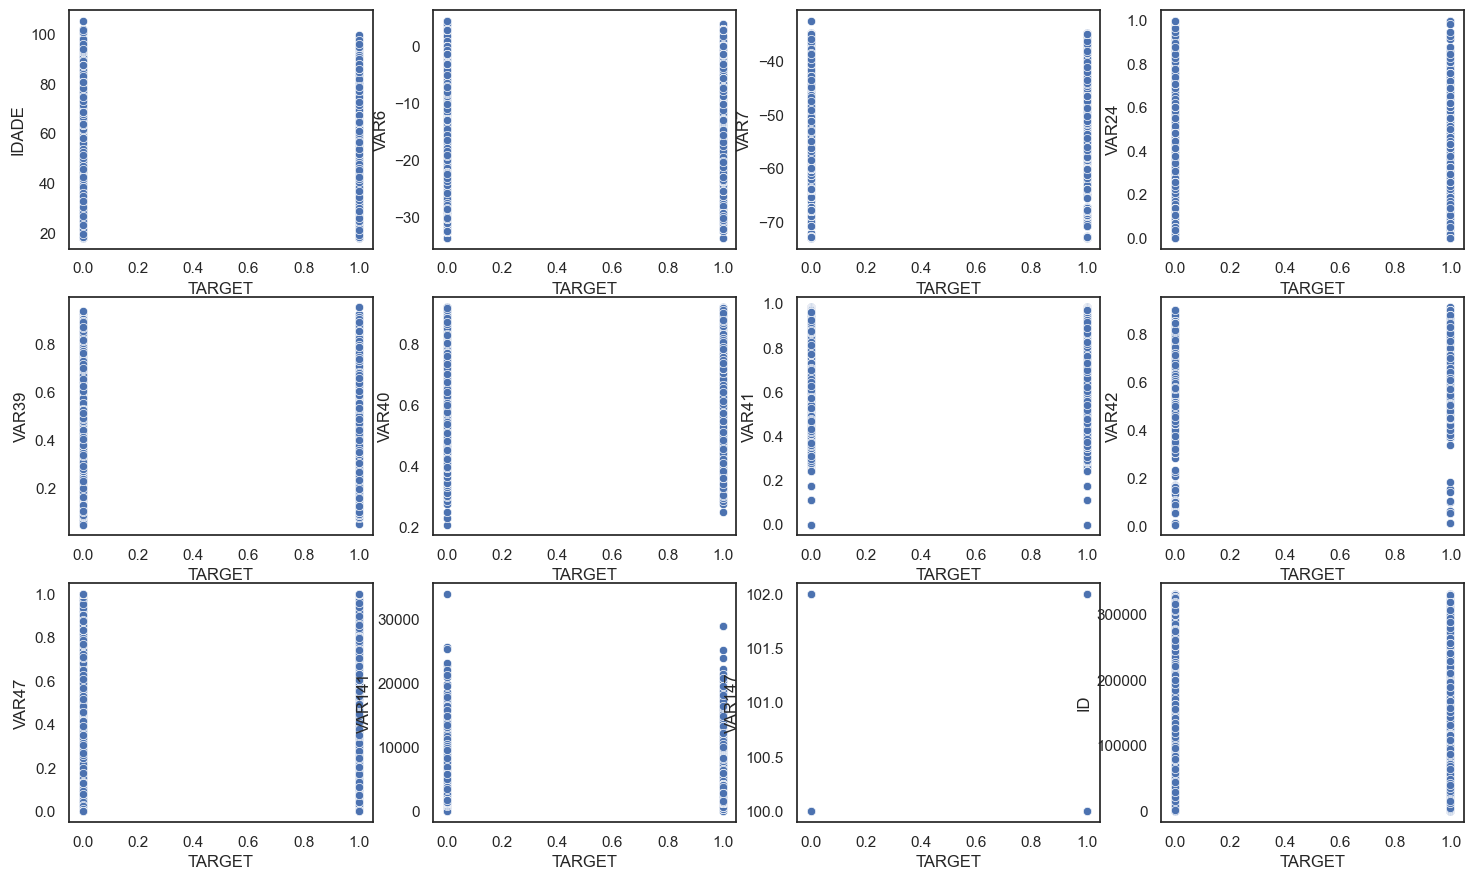

In [196]:
plt.figure(figsize = (18, 18))
data_num_0 = data_num[data_num['TARGET'] == 0].drop(columns=['TARGET'])
data_num_1 = data_num[data_num['TARGET'] == 1].drop(columns=['TARGET'])
for i in range(1, len(columns_to_keep)):
    plt.subplot(5, 4, i)
    sns.scatterplot(data=data_num, x=data_num['TARGET'], y=columns_to_keep[i], color='b')

#### Efeito da idade no pagamento

### Variáveis Categóricas

Correlação das variáveis categóricas

Correlação das variáveis categóricas codificadas

In [197]:
data_cat_encoded['TARGET'] = data['TARGET']

In [198]:
data_cat['TARGET'] = data['TARGET']

In [199]:
data_cat_encoded.corr()

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,TARGET
VAR2,1.000000,0.049857,0.041219,0.017383,0.050253,0.141621,0.012110,0.000669,0.041977,0.008904,...,0.015587,0.012295,0.006927,0.018873,-0.004595,0.006039,0.007221,0.005305,0.002261,0.071477
VAR49,0.049857,1.000000,0.161402,0.046607,0.075505,0.037747,0.046062,0.065099,0.116475,0.035712,...,-0.003393,0.014184,0.002708,0.008191,0.011889,0.012122,0.004071,0.006799,0.025160,-0.002615
VAR50,0.041219,0.161402,1.000000,0.201160,0.117343,0.137450,0.016137,0.403334,0.120303,-0.034217,...,-0.025367,-0.008968,-0.026371,-0.021008,0.036273,-0.017985,-0.021130,-0.025080,0.007506,0.002494
VAR51,0.017383,0.046607,0.201160,1.000000,0.098467,0.090510,0.039525,0.104825,0.084470,-0.015045,...,-0.003533,0.009281,-0.003963,-0.004607,0.021193,0.003940,0.001151,-0.000440,0.007685,0.007384
VAR52,0.050253,0.075505,0.117343,0.098467,1.000000,0.046532,0.050500,0.052270,0.099849,0.017848,...,-0.006019,0.001213,-0.008041,-0.003862,0.013833,-0.004341,-0.008497,-0.007404,0.007429,-0.002872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAR137,0.006039,0.012122,-0.017985,0.003940,-0.004341,0.003645,0.015054,-0.016255,0.012970,0.027840,...,0.507638,0.519805,0.688234,0.508454,0.363156,1.000000,0.675477,0.696795,0.284397,0.044168
VAR138,0.007221,0.004071,-0.021130,0.001151,-0.008497,0.003121,0.015056,-0.017762,0.013257,0.027739,...,0.427310,0.436551,0.606687,0.443927,0.319385,0.675477,1.000000,0.599593,0.272238,0.045166
VAR139,0.005305,0.006799,-0.025080,-0.000440,-0.007404,-0.003481,0.012144,-0.019733,0.006069,0.027494,...,0.557930,0.515082,0.683486,0.544407,0.219755,0.696795,0.599593,1.000000,0.154943,0.039351
VAR140,0.002261,0.025160,0.007506,0.007685,0.007429,0.014298,0.012861,-0.006341,0.012599,0.013340,...,0.052387,0.127943,0.205180,0.044310,0.387024,0.284397,0.272238,0.154943,1.000000,0.011784


In [200]:
correlations = data_cat_encoded.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 VAR68     0.050745
VAR82     0.050813
VAR126    0.050930
VAR94     0.050973
VAR83     0.050996
VAR74     0.051064
VAR92     0.051093
VAR98     0.052194
VAR66     0.053771
VAR118    0.054209
VAR72     0.055074
VAR84     0.055379
VAR89     0.056241
VAR2      0.071477
TARGET    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 VAR120   -0.041247
VAR10    -0.038620
VAR64    -0.012372
VAR9     -0.010645
VAR63    -0.006501
VAR54    -0.003243
VAR52    -0.002872
VAR49    -0.002615
VAR56    -0.002325
VAR58    -0.000816
VAR61    -0.000245
VAR59     0.000980
VAR60     0.001829
VAR57     0.001924
VAR50     0.002494
Name: TARGET, dtype: float64


In [201]:
data_cat_encoded.describe()

,VAR2,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,...,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,TARGET
count,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.00000,90690.000000,90690.000000,...,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000,90690.000000
mean,0.449190,0.938009,0.282732,0.031823,0.079413,0.021105,0.031106,0.06026,0.170316,0.018933,...,1.509814,1.382016,1.430080,1.527026,1.240501,1.250469,1.303076,1.387573,1.512041,0.224854
std,0.497414,0.241141,0.450330,0.175529,0.270384,0.143735,0.173605,0.23797,0.375913,0.136288,...,1.197073,1.133815,1.113002,1.199881,1.096485,1.022822,1.054731,1.075665,1.587927,0.417488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


# Pré-processamento das variáveis

### Imputação de missing values

### Introduzindo variáveis de interação entre variáveis bastante correlacionadas com o target

In [ ]:
poly_features = data[['IDADE', 'TARGET']]
poly_features_test = test[['IDADE']]

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
#poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

### Normalização e Scalling

Juntando todas as variáveis que serão usadas para treino em um só dataframe, e separando a variável de target

In [137]:
train = pd.concat([data_num, data_cat_encoded], axis=1).drop(columns=['TARGET'])
target = data['TARGET']

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)



array([[-0.71412113,  0.70065799, -2.4138783 , ..., -0.28735109,
         0.56935038, -0.32246061],
       [-0.27750278,  0.8853351 ,  1.51892522, ..., -0.28735109,
        -0.36031214, -0.95221605],
       [-0.75716021, -1.4204194 , -0.97883804, ..., -1.23546544,
        -0.36031214,  1.56680568],
       ...,
       [-0.9675812 ,  0.24609808,  1.00994752, ..., -0.28735109,
        -1.28997466, -0.95221605],
       [-1.72207986, -0.78402409, -0.17198697, ...,  0.66076325,
         0.56935038, -0.32246061],
       [-0.80096044, -0.80126476, -0.39741905, ...,  1.60887759,
         0.56935038, -0.32246061]])

# Treinamento
Nesta sessão vou treinar uma seleção de modelos de machine learning a fim de comparar as performances.

Para cada modelo vou fazer também uma otimização de hiperparâmetros e usar k-fold cross-validation para obter uma avaliação de performance média para cada modelo.

Os modelos selecionados serão: Logistic Regression, Random Forest e Gradient Boosting.

Outro variante vai ser o encoding das variáveis categóricas (Ordinal ou OHE) e a utilização das variáveis categóricas não encodificadas no modelo de Random Forest.

Outro variante será utilizar um conjunto de dados com dimensionalidade reduzida (PCA), e outro com Feature Selection.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

#### Métricas de Avaliação

Como a variável de target é desbalanceada entre as classes, a acurácia não é tão indicada como métrica de avaliação. Vou usar então a métrica ROC-AUC, F1, Precision e Recall, para avaliar meus modelos.

In [140]:
# função que imprime a ROC curve, AUC, F1 score, Precision e Recall a partir dos resultados de treino. 
def print_results(train_scores, test_scores, fold_names):
    avg = test_scores.mean()
    std = test_scores.std()
    print("Average: %.2f" % (avg * 100))
    print("Accuracy interval with k-fold cross validation: %.2f, %.2f" % ((avg - 2*std)*100, (avg + 2*std)*100))
    metrics = pd.DataFrame({'fold': fold_names,
                        'train': train_scores,
                        'valid': test_scores})
    return metrics

In [141]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42, stratify = target)

### Dimensionality Reduction

Aplicando PCA no dataset de treino

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(train_scaled)
PCA_data = pd.DataFrame(pca.transform(train_scaled))

In [143]:
PCA_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.960668,3.611289,0.058119,1.083354,-0.064320,-2.034732,1.419304,0.938935,-0.951188,-1.219289,-1.167977,-2.312187,1.476205,0.503379,-0.771987,0.201713,0.333146,0.159472,-0.677651,-0.191145
1,4.160101,0.254292,-1.118582,-3.061678,0.032737,-0.733056,0.720410,0.569761,-0.069645,-0.424178,0.308224,-0.994607,-2.347380,-1.095347,-0.545869,0.189618,0.356265,0.552975,-1.224466,-0.597937
2,-9.149950,-0.973383,0.926466,2.708745,-0.747362,1.032939,-2.622684,0.146298,-0.085424,1.537594,-0.949515,-0.833698,1.109656,0.286975,-0.299549,0.373024,-0.301491,-0.294218,-0.326128,-0.633484
3,8.049717,-3.636808,0.105437,-2.017221,-1.779603,-0.936339,1.201741,-0.553317,-1.327703,2.220007,-0.030373,-0.284768,0.385361,1.345794,-0.781249,-0.002945,1.130918,0.320059,0.322372,0.979510
4,10.036744,-2.777547,1.116108,2.981059,5.006663,1.131170,2.241072,-2.016920,-0.727779,0.383008,0.526955,0.225254,1.987385,1.297383,-0.564304,0.684423,-0.840425,0.100007,1.719892,-0.589217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90685,3.951436,-3.029106,-0.542108,-0.451794,-0.369179,-1.861516,-0.018073,-0.364142,-2.359488,0.138749,-1.838333,0.750586,0.217102,0.050119,0.740140,-0.508670,0.168930,-0.179940,-0.335191,0.234402
90686,2.127257,3.820602,1.144846,-1.212596,1.271005,4.080246,1.310577,2.866553,0.689685,5.244530,-0.353206,2.137814,0.641847,1.500875,-1.062218,-1.852366,1.476021,-0.427547,-0.370916,4.953522
90687,-5.118021,-0.838590,-1.787724,-2.760912,-0.020300,0.248165,1.021650,0.829646,-0.463088,-0.815074,0.637408,-0.041443,-0.101990,-0.476159,-0.521762,0.238020,-0.098932,0.533943,0.536676,-0.241253
90688,1.397449,1.103502,-1.472991,-0.437116,-0.430178,0.617799,-0.528972,-0.194552,-0.240226,-0.237633,-0.742806,0.587727,0.135281,-0.121062,0.539320,-0.516040,-0.001633,1.571116,0.026944,0.565101


### Feature selection

In [144]:
''' from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(train_scaled, target)
'''

' from sklearn.feature_selection import SelectKBest, chi2\n\nselector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features\nX_train_selected = selector.fit_transform(train_scaled, target)\n'

## Baselines

### Regressão Logística

Sem PCA

In [150]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)

model = LogisticRegression()
results = cross_validate(model, train_scaled, target, cv=cv, return_train_score=False, scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall'])
results

{'fit_time': array([1.19445443, 0.98675919, 0.83242178, 0.68457484, 0.90447187]),
 'score_time': array([0.04265308, 0.05256128, 0.04301786, 0.05044556, 0.04581952]),
 'test_accuracy': array([0.77643621, 0.77472709, 0.77351417, 0.77428603, 0.77704267]),
 'test_roc_auc': array([0.60089439, 0.60073807, 0.59463807, 0.5967874 , 0.60258584]),
 'test_f1': array([0.00196899, 0.000978  , 0.00097276, 0.        , 0.00098814]),
 'test_precision': array([1.        , 0.66666667, 0.5       , 0.        , 0.66666667]),
 'test_recall': array([0.00098546, 0.00048936, 0.00048685, 0.        , 0.00049444])}

Com PCA

In [146]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)

model = LogisticRegression()
results = cross_validate(model, PCA_data, target, cv=cv, return_train_score=True)
print_results(results)

Average: 77.52
Accuracy interval with k-fold cross validation: 77.27, 77.77


### Random Forest

Com variáveis categóricas encodificadas

In [151]:
SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)
model = RandomForestClassifier()
results = cross_validate(model, train, target, cv=cv, return_train_score=False, scoring = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall'])
results

{'fit_time': array([63.15381718, 61.83200264, 63.0417788 , 63.50957465, 64.27593231]),
 'score_time': array([2.12842822, 2.0994184 , 2.11935687, 2.14903259, 2.2585547 ]),
 'test_accuracy': array([0.77549895, 0.77345904, 0.77180505, 0.77345904, 0.77566435]),
 'test_roc_auc': array([0.58494638, 0.57741413, 0.58957197, 0.58386937, 0.5807496 ]),
 'test_f1': array([0.04592315, 0.04419632, 0.04256303, 0.03702836, 0.04146054]),
 'test_precision': array([0.46889952, 0.44811321, 0.42790698, 0.45402299, 0.44      ]),
 'test_recall': array([0.02414388, 0.02324443, 0.02239533, 0.01930125, 0.02175525])}

Variáveis categóricas sem encodificação

SEED=301
np.random.seed(SEED)
cv = KFold(n_splits=5, shuffle=True)
modelo = RandomForestClassifier()
results = cross_validate(model, train_scaled, target, cv=cv, return_train_score=False)
print_results(results)

# Análise financeira

# Escoragem da base Out-of-time